In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Relaxation Methods for Partial Diﬀerential Equations

* Author: Pochung Chen
* Email: pcchen@phys.nthu.edu.tw

Last updated on 11/8/2021

## Physics background

For a region of space containing a charge density $\rho$, the electrostatic potential $V$ satisfies **Poission's equation**:

$$
  \nabla^2 V 
  = \frac{\partial^2 V}{\partial^2 x} + \frac{\partial^2 V}{\partial^2 y} + \frac{\partial^2 V}{\partial^2 z}
  = -\frac{1}{\epsilon_0} \rho.
$$

When $\rho=0$ Poission's equation reduces to **Laplace's equation**:

$$
  \nabla^2 V
  = \frac{\partial^2 V}{\partial^2 x} + \frac{\partial^2 V}{\partial^2 y} + \frac{\partial^2 V}{\partial^2 z}
  = 0.
$$

From the potential we can derive the electric field,
$$
  \vec{E}
  = -\vec{\nabla}V
  = \left(-\frac{\partial V}{\partial x}, -\frac{\partial V}{\partial y}, -\frac{\partial V}{\partial z}\right).
$$


## Discretization and the relaxation method

We consider a mesh of grid points that covers the domain of interest. For simplicity we assume in each direction the spacing between grid points is $h$.

$$
  (x_i, y_j, z_k) = (x_0, y_0, z_0) + h (i, j, k).
$$

We need to find the discretized version of the differential operator $\nabla^2$.

We first Taylor expand $V(x,y,z)$ in $x$ to second order:

$$
  V(x\pm h,y,z) = V(x,y,z) \pm h \frac{\partial V}{\partial x} + \frac{1}{2}h^2 \frac{\partial^2 V}{\partial x^2} + \cdots
$$

so that

$$
  \frac{\partial^2 V}{\partial x^2} \approx \frac{V(x+h)+V(x-h)-2V(x)}{h^2}
$$
and similarly for $y$ and $z$.

We hence obtain the discrete approximation to the laplacian:

$$
  \nabla^2 V \approx
  \frac{V(x+h,y,z)+V(x-h,y,z)-2V(x,y,z)}{h^2} + \frac{V(x,y+h,z)+V(x,y-h,z)-2V(x,y,z)}{h^2} + \frac{V(x,y,z+h)+V(x,y,z-h)-2V(x,y,z)}{h^2}
$$

## Laplace's equation

If we use a grid notation
* $V(x, y, z)=V_{i,j,k}$
* $V(x+h, y, z)=V_{i+1, j, k}$
* $V(x, y+h, z)=V_{i, j+1, k}$
* $V(x, y, z+h)=V_{i, j, k+1}$

then the discretized verion of Laplace's equation becomes

$$
  h^2 \nabla^2 V = 0 \approx 
  \left( V_{i+1,j,k}+V_{i-1,j,k}+V_{i,j+1,k}+V_{i,j-1,k}+V_{i,j,k+1}+V_{i,j,k-1} \right)
  -6V_{i,j,k}.
$$

This can be re-written as

$$
  V_{i,j,k} = \frac{1}{6}\left( V_{i+1,j,k}+V_{i-1,j,k}+V_{i,j+1,k}+V_{i,j-1,k}+V_{i,j,k+1}+V_{i,j,k-1} \right).
$$

For effective 2D problems,

$$
  V_{i,j} = \frac{1}{4}\left( V_{i+1,j}+V_{i-1,j}+V_{i,j+1}+V_{i,j-1} \right).
$$

For effective 1D problems,

$$
  V_{i} = \frac{1}{2}\left( V_{i+1}+V_{i-1} \right).
$$



## Poission's equation

If charges are present. First we replace the charge density $\rho(x,y,z)$ by a discrete distribution $\rho_{i,j,k}=\rho(x_i,y_j,z_k)$.

The discretized version of Poisson's equation becomes

$$
  h^2 \nabla^2 V = -h^2 \frac{1}{\epsilon_0} \rho_{i,j,k} \approx 
  -6V_{i,j,k}.
$$

This can be re-written as

$$
  V_{i,j,k} = \frac{1}{6}\left( V_{i+1,j,k}+V_{i-1,j,k}+V_{i,j+1,k}+V_{i,j-1,k}+V_{i,j,k+1}+V_{i,j,k-1} + \frac{1}{\epsilon_0}h^3\rho_{i,j,k} \right).
$$

For effective 2D problems,

$$
  V_{i,j} = \frac{1}{4}\left( V_{i+1,j}+V_{i-1,j}+V_{i,j+1}+V_{i,j-1} + \frac{1}{\epsilon_0}h^2\rho_{i,j,k} \right).
$$

For effective 1D problems,

$$
  V_{i} = \frac{1}{2}\left( V_{i+1}+V_{i-1} + \frac{1}{\epsilon_0}h\rho_{i,j,k} \right).
$$


### Exact solution in 1D
In 1D, the Laplace's equation reads

$$
  \frac{d^2 V(x)}{dx^2} = 0.
$$

The solution has the form $V(x)=ax+b$ where $a$ and $b$ are constants.

## Tasks: Jacobi method and Gauss-Seidel method

* Write a program to compute $V$ in a rectangular domain with Dirichlet boundary conditions. 
* Allow the potentials on all four sides to be specified arbitrarily. 
* The number of grid point can be changed.

#### Jacobi and Gauss-Seidel methods

* Study the relative speed of the Jacobi and Gauss-Seidel methods.

In [16]:
#a=np.array([0])

a=np.array([1,1,1,1,1])
b=np.array([1,1,1,1,1])
c=np.array(b[2:]+a[0:-2])
c=np.append(np.append([0],c),[100])

print(c)


[  0   2   2   2 100]


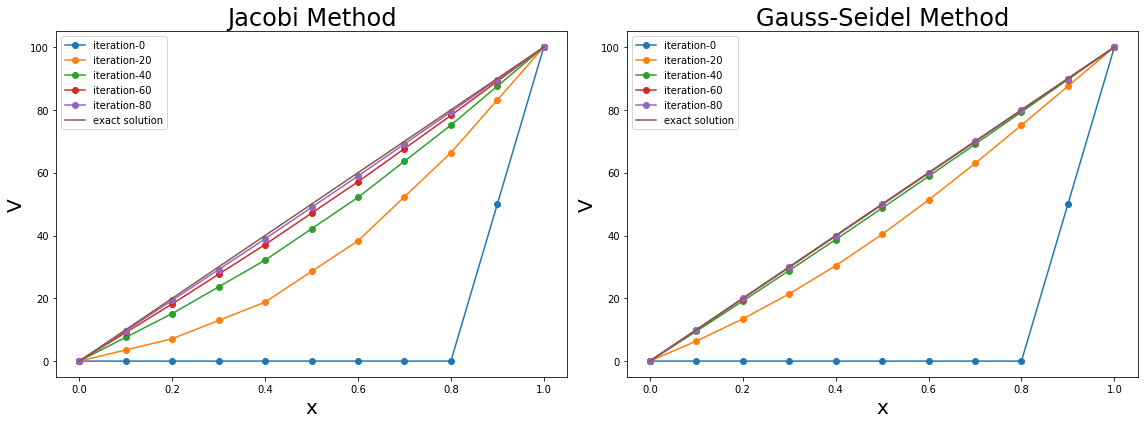

In [17]:
x=np.linspace(0,1,11)
y=np.linspace(0,100,101)
v=np.zeros(11)
v1=np.zeros(11)
v[10]=100
fig, ax=plt.subplots(ncols=2,nrows=1,figsize=(16,6))
#Jacobi Method
for j in range (100):
    a=np.array(0.5*(v[0:-2]+v[2:]))
    v=np.append(np.append([0],a),[100])
    if j%20==0:
        ax[0].plot(x,v,'-o',label="iteration-"+format(j))
ax[0].plot(x,100*x,label="exact solution")
ax[0].set_xlabel('x',fontsize=20)
ax[0].set_ylabel('V',fontsize=20)
ax[0].legend()
ax[0].set_title('Jacobi Method', fontsize=24)
#Gauss-Seidel Method
v=np.zeros(11)
v[10]=100
for j in range (100):
    for i in range (1,10):
        v[i]=0.5*(v[i-1]+v[i+1])          
    if j%20==0:
        ax[1].plot(x,v,'-o',label="iteration-"+format(j))
ax[1].plot(x,100*x,label="exact solution")
ax[1].set_xlabel('x',fontsize=20)
ax[1].set_ylabel('V',fontsize=20)
ax[1].legend()
ax[1].set_title('Gauss-Seidel Method', fontsize=24)
fig.tight_layout()

### Initial conditions

* Study if the initial guess have a significant impact on overall speed.

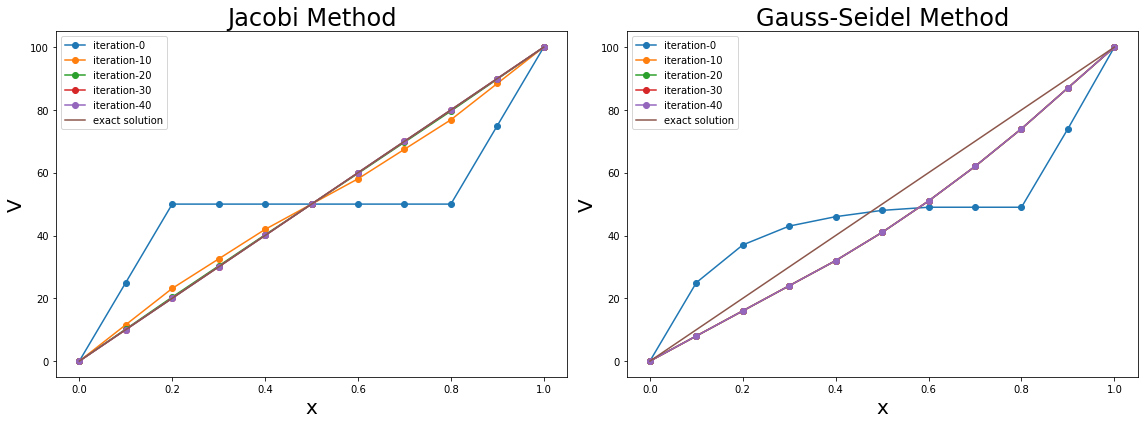

In [57]:
x=np.linspace(0,1,11)
y=np.linspace(0,100,101)
v=np.full(11,50)
v[10]=100
v[0]=0
fig, ax=plt.subplots(ncols=2,nrows=1,figsize=(16,6))
#Jacobi Method
for j in range (50):
    a=np.array(0.5*(v[0:-2]+v[2:]))
    v=np.append(np.append([0],a),[100])
    if j%10==0:
        ax[0].plot(x,v,'-o',label="iteration-"+format(j))
ax[0].plot(x,100*x,label="exact solution")
ax[0].set_xlabel('x',fontsize=20)
ax[0].set_ylabel('V',fontsize=20)
ax[0].legend()
ax[0].set_title('Jacobi Method', fontsize=24)
#Gauss-Seidel Method
v=np.full(11,50)
v[10]=100
v[0]=0
v[10]=100
for j in range (50):
    for i in range (1,10):
        v[i]=0.5*(v[i-1]+v[i+1])          
    if j%10==0:
        ax[1].plot(x,v,'-o',label="iteration-"+format(j))
ax[1].plot(x,100*x,label="exact solution")
ax[1].set_xlabel('x',fontsize=20)
ax[1].set_ylabel('V',fontsize=20)
ax[1].legend()
ax[1].set_title('Gauss-Seidel Method', fontsize=24)
fig.tight_layout()

## Tasks: Contour plots (equipotentials) and electric field 

* Write a program to compute $V$ in a rectangular domain with Dirichlet boundary conditions. 
* Allow the potentials on all four sides to be specified arbitrarily. 
* The number of grid point can be changed.
* Use Jacobi method or Gauss-Seidel method.
* Use some good initial guess.
* Plot the equipotentials.
* Plot the electric fields.

Text(0.5, 1.0, 'Electric Potential')

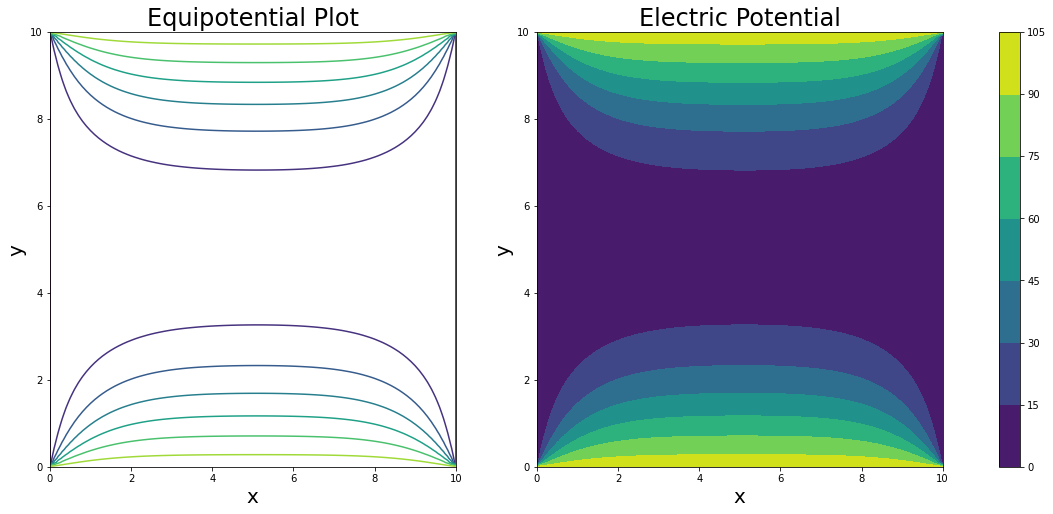

In [36]:
fig, ax=plt.subplots(ncols=2,nrows=1, figsize=(20,8))
ax=ax.flatten()
v=np.zeros(10201).reshape(101,101)
v[:][0]=100
v[:][100]=100
for k in range (500):
    for i in range (1,100):
        for j in range (1,100):  
            v[i][j]=0.25*(v[i-1][j]+v[i+1][j]+v[i][j+1]+v[i][j-1])
x=np.linspace(0,10,101)
y=np.linspace(0,10,101)
cs = ax[0].contour(x, y, v)
cs = ax[1].contourf(x, y, v)
fig.colorbar(cs,ax=ax.ravel().tolist())
ax[0].set_xlabel('x',fontsize=20)
ax[0].set_ylabel('y',fontsize=20)
ax[0].set_title('Equipotential Plot', fontsize=24)
ax[1].set_xlabel('x',fontsize=20)
ax[1].set_ylabel('y',fontsize=20)
ax[1].set_title('Electric Potential', fontsize=24)




Text(0.5, 1.0, 'Electric Field')

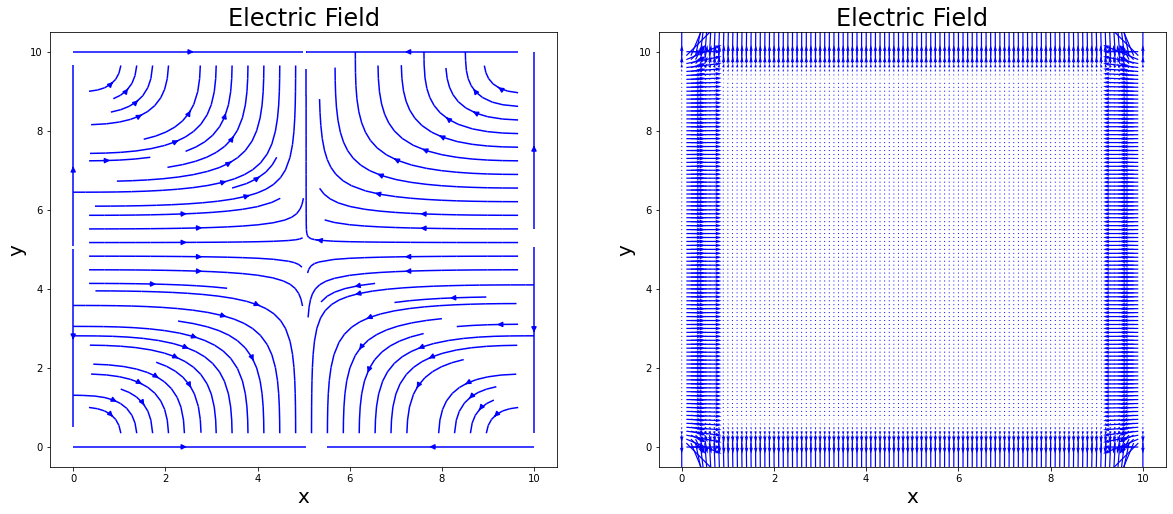

In [37]:
fig, ax=plt.subplots(ncols=2,nrows=1,figsize=(20,8))
v=np.zeros(10201).reshape(101,101)
Ex=np.zeros(101)
Ey=np.zeros(101)
v[:][0]=100
v[:][100]=100

for k in range (500):
    for i in range (1,100):
        for j in range (1,100):  
            v[i][j]=0.25*(v[i-1][j]+v[i+1][j]+v[i][j+1]+v[i][j-1])
                   
for i in range (1,100):
    Ex[i]=0.5*(v[i-1][j]-v[i+1][j])
    for j in range (1,100):
        Ey[j]=0.5*(v[i][j-1]-v[i][j+1])
x=np.linspace(0,10,101)
y=np.linspace(0,10,101)
U,V=np.meshgrid(Ex,Ey, indexing='xy')
ax[0].streamplot(x, y, U, V, color='b')
ax[1].quiver(x, y, U, V, color='b')
fig.tight_layout
ax[0].set_xlabel('x',fontsize=20)
ax[0].set_ylabel('y',fontsize=20)
ax[0].set_title('Electric Field', fontsize=24)
ax[1].set_xlabel('x',fontsize=20)
ax[1].set_ylabel('y',fontsize=20)
ax[1].set_title('Electric Field', fontsize=24)

In [12]:
# for contour plot
# fig, ax = plt.subplots(figsize=(10,8))
# cs = ax.contour(X, Y, V)
# cs = ax.contourf(X, Y, V)
# fig.colorbar(cs)

# for electric field
# ax.streamplot(x, y, Ex, Ey, color='b')
# ax.quiver(x, y, Ex, Ey, color='b')


## Tasks: Adding charges

* Modify your code to allow point charges to be placed at arbitrary mesh points.

### Single charge

* Compute the potential due to a single charge.
* Verify that the potential falls off logarithmically, i.e., if $r\rightarrow 2r$ then the potential decreases by a factor of $\ln 2$ (for a positive charge).

### Dipole

* Compute the potential due to an electric dipole.
* What is the expected $r$ dependence? 
* Does your results have the expacted behavior?

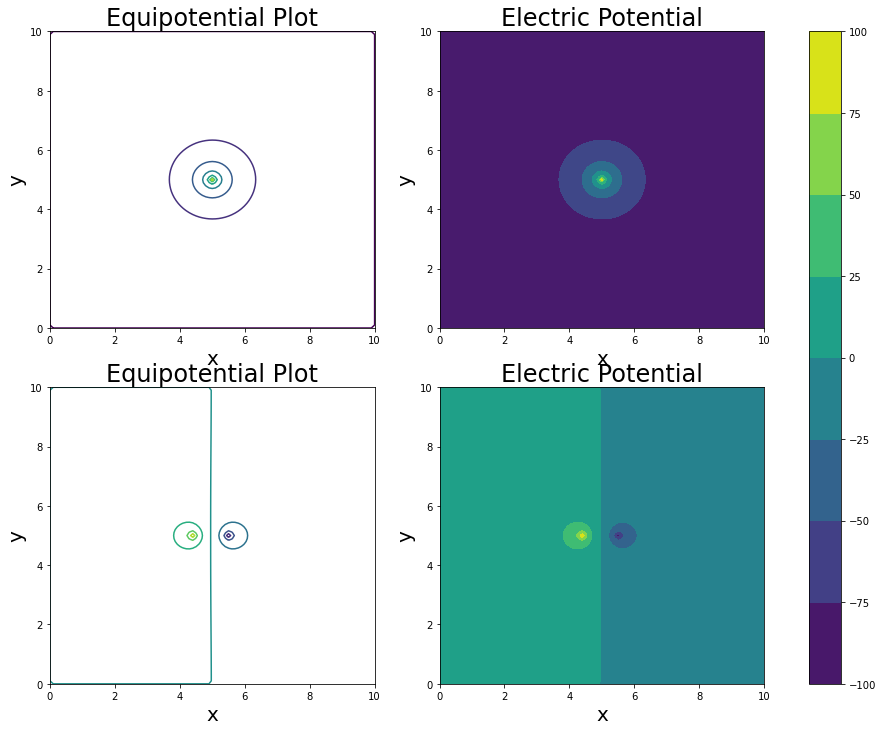

In [56]:
fig, ax=plt.subplots(ncols=2,nrows=2, figsize=(16,12))
ax=ax.flatten()
v=np.zeros(10201).reshape(101,101)
#v[:][0]=100
#v[:][100]=100
v[50][50]=100
for k in range (500):
    for i in range (1,100):
        for j in range (1,100):
            v[50][50]=100
            v[i][j]=0.25*(v[i-1][j]+v[i+1][j]+v[i][j+1]+v[i][j-1])

x=np.linspace(0,10,101)
y=np.linspace(0,10,101)
cs = ax[0].contour(x, y, v)
cs = ax[1].contourf(x, y, v)
ax[0].set_xlabel('x',fontsize=20)
ax[0].set_ylabel('y',fontsize=20)
ax[0].set_title('Equipotential Plot', fontsize=24)
ax[1].set_xlabel('x',fontsize=20)
ax[1].set_ylabel('y',fontsize=20)
ax[1].set_title('Electric Potential', fontsize=24)

u=np.zeros(10201).reshape(101,101)
u[50][44]=100
u[50][55]=-100
for k in range (1000):
    for i in range (1,100):
        for j in range (1,100):
            u[50][44]=100
            u[50][55]=-100
            u[i][j]=0.25*(u[i-1][j]+u[i+1][j]+u[i][j+1]+u[i][j-1])

x=np.linspace(0,10,101)
y=np.linspace(0,10,101)
cs = ax[2].contour(x, y, u)
cs = ax[3].contourf(x, y, u)
ax[2].set_xlabel('x',fontsize=20)
ax[2].set_ylabel('y',fontsize=20)
ax[2].set_title('Equipotential Plot', fontsize=24)
ax[3].set_xlabel('x',fontsize=20)
ax[3].set_ylabel('y',fontsize=20)
ax[3].set_title('Electric Potential', fontsize=24)
fig.colorbar(cs,ax=ax.ravel().tolist())


Text(0.5, 1.0, 'Electric Field')

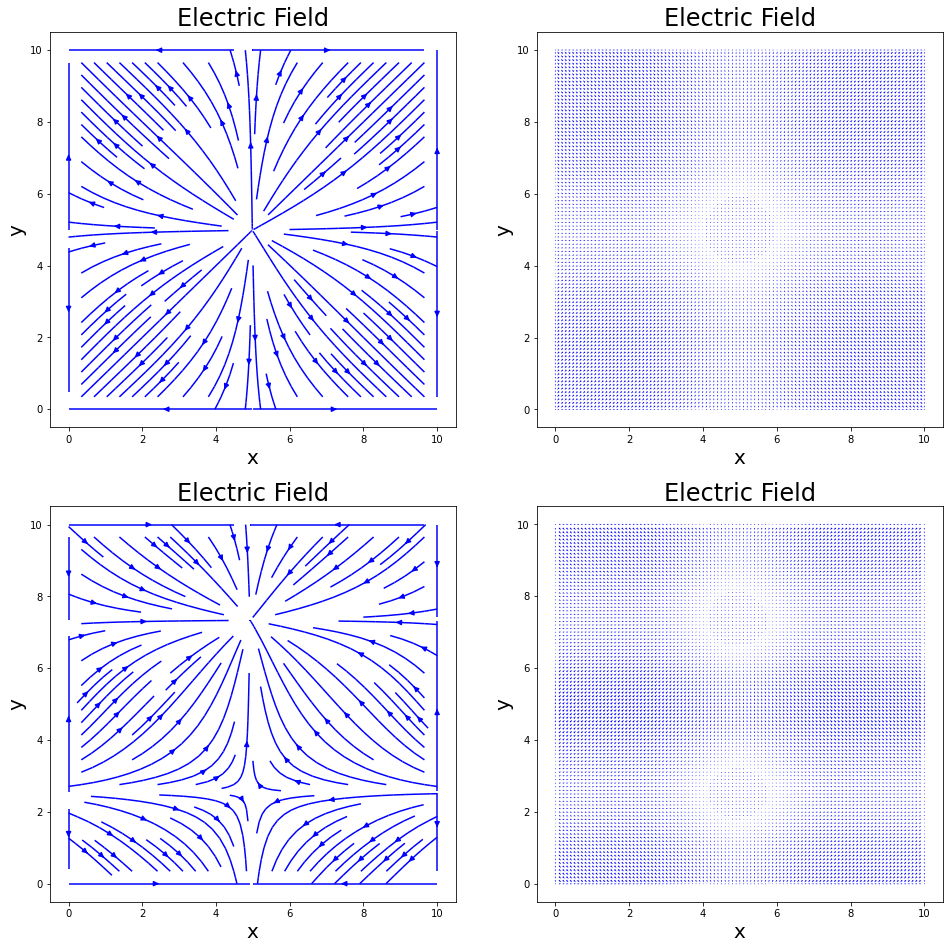

In [57]:
fig, ax=plt.subplots(ncols=2,nrows=2, figsize=(16,16))
ax=ax.flatten()
v=np.zeros(10201).reshape(101,101)
v[50][50]=100
for k in range (500):
    for i in range (1,100):
        for j in range (1,100):
            v[50][50]=100
            v[i][j]=0.25*(v[i-1][j]+v[i+1][j]+v[i][j+1]+v[i][j-1])
            
Ex=np.zeros(101)
Ey=np.zeros(101)
for k in range (500):
    for i in range (1,100):
        for j in range (1,100):  
            v[i][j]=0.25*(v[i-1][j]+v[i+1][j]+v[i][j+1]+v[i][j-1])
                   
for i in range (1,100):
    Ex[i]=0.5*(v[i-1][j]-v[i+1][j])
    for j in range (1,100):
        Ey[j]=0.5*(v[i][j-1]-v[i][j+1])
x=np.linspace(0,10,101)
y=np.linspace(0,10,101)
U,V=np.meshgrid(Ex,Ey, indexing='xy')
ax[0].streamplot(x, y, U, V, color='b')
ax[1].quiver(x, y, U, V, color='b')
ax[0].set_xlabel('x',fontsize=20)
ax[0].set_ylabel('y',fontsize=20)
ax[0].set_title('Electric Field', fontsize=24)
ax[1].set_xlabel('x',fontsize=20)
ax[1].set_ylabel('y',fontsize=20)
ax[1].set_title('Electric Field', fontsize=24)

u=np.zeros(10201).reshape(101,101)
u[50][44]=100
u[50][55]=-100
for k in range (500):
    for i in range (1,100):
        for j in range (1,100):
            u[50][44]=100
            u[50][55]=-100
            u[i][j]=0.25*(u[i-1][j]+u[i+1][j]+u[i][j+1]+u[i][j-1])

Ex=np.zeros(101)
Ey=np.zeros(101)
for k in range (500):
    for i in range (1,100):
        for j in range (1,100):  
            u[i][j]=0.25*(u[i-1][j]+u[i+1][j]+u[i][j+1]+u[i][j-1])
                   
for i in range (1,100):
    Ex[i]=0.5*(u[i-1][j]-u[i+1][j])
    for j in range (1,100):
        Ey[j]=0.5*(u[i][j-1]-u[i][j+1])
        
x=np.linspace(0,10,101)
y=np.linspace(0,10,101)
U,V=np.meshgrid(Ex,Ey, indexing='xy')
ax[2].streamplot(x, y, U, V, color='b')
ax[3].quiver(x, y, U, V, color='b')
ax[2].set_xlabel('x',fontsize=20)
ax[2].set_ylabel('y',fontsize=20)
ax[2].set_title('Electric Field', fontsize=24)
ax[3].set_xlabel('x',fontsize=20)
ax[3].set_ylabel('y',fontsize=20)
ax[3].set_title('Electric Field', fontsize=24)

## Tasks: Parallesl sheets of charges

* Use your program to calculate the potential for parallel lines of charges.
* Compute the capacitance.


### Method-1

* Use two edges of the domain as the plates.
* Use periodic boundary conditions in the direction along the plates.

### Method-2

* Introduce actual lines of equal and opposite charge **NOT** on the boundaries, and solve Poisson's equation both between and outside the plates.
* Stretch the liens of charges across the domain and impose periodic boundary conditions in the directions along the sheets.
* Impose *anti-periodic* boundary conditions in the direction perpendicular to the sheets (make sure you understand why), i.e., $V_{bottom}=-V_{top}.

### Method-3

* Now consider two finite slabs.
* What are the appropriate boundary conditions.

## Tasks: Concentric rectangles

* Modify your program to solve for $V$between two recrangular boundaries held at constant potential.
* Calculate the surface charge density on the boundary surface. $\lambda = \epsilon_0 \vec{n}\cdot \vec{E}$.
* Determine the totla charge on each surface. How do they compare?
* Determine the capacitance of the system.

## Tasks: Elaborations (Bonus!)

If you are ambitious, try to implement
* Overrelaxation method.
* Multigruid mehtod.